# Exploratory Data Analysis and Data Visualization

Exploratory Data Analysis and Data Visualization are done for the following reasons:

- Identify additional problems in the data that require cleaning or awareness (e.g., bias, inconsistent entries, coding issues)
- Determine needed data transformations
- Indicate directions for analysis

In [6]:
# Packages for loading, cleaning, visualization, and analysis

# Data
import pandas as pd
import numpy as np
import scipy as sp
import os
import string as st

import json

# Graphing and visualizing
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from pylab import savefig


# Printing
import locale

# Show plots locally
locale.setlocale( locale.LC_ALL, '' )

%matplotlib inline

### In Class Exercise 1

Load the clean train accidents data and look at the summaries of quantitative and qualitative variables. List a few transformations or data operations suggested by these summaries. Also what variables are response variables and what variables are predictors?

### In Class Exercise 1 Answers

Loading was done successfully.

Having looked at the summaries of quantitative variables, it seems likely that we're going to want to do some transformations. First, for a lot of the response variables that we are interested in (ACCDMG, EQPDMG, TRKDMG, CARSDMG, TOTKLD, TOTINJ), we're going to need to look at some sort of log transformations to deal with the alrge amount of skewness. Then for a lot of the continuous predictors we are interested in (TRNSPD, TONS), we'll need to do a scale transformation to factor in the large different in scale of these variables (1 to 140 mph vs 1 to 1 million tons). For a predictor variable like ACCAUSE we should conside a transformation to simplify the data by just using the first letter of that data since it contains important information and results in many fewer classes. And then for predictor variables like TEMP and MONTH we'll need to factor in seasonality. 

Response Variables - ACCDMG, EQPDMG, TRKDMG, CARSDMG, TOTKLD, TOTINJ
Predictor Variables - TRNSPD, TONS, TEMP, MONTH, ACCAUSE, (just about every other variable)

## Load the accident data

In [7]:
# Read the JSON file
# Make the keys integers again

path = '/Users/mead/Fall2017/DonBrown-DS6001/InClass1/'

file = 'TrainNarratives.txt'


with open(path + file) as json_file:  
    Narrative_dict = json.load(json_file)
    
str_index = [int(x) for x in Narrative_dict.keys()]

Narrative_dict = dict(zip(str_index, Narrative_dict.values()))

In [8]:
# Load the train accident data

path = '/Users/mead/Fall2017/DonBrown-DS6001/InClass1/'

file = 'FullCleanedAdrian.csv'

accidents_df = pd.read_csv(path + file, low_memory = False)

accidents_df.shape

# Putting Narrative back into the dataframe

accidents_df['Narrative'] = Narrative_dict.values()

# Check dimensions
accidents_df.shape

(38167, 89)

In [11]:
# Look at the columns
accidents_df.columns

Index([u'Unnamed: 0', u'ACCAUSE', u'ACCDMG', u'ACCTRK', u'ACCTRKCL', u'AMPM',
       u'CABOOSE1', u'CABOOSE2', u'CARNBR1', u'CARS', u'CARSDMG', u'CARSHZD',
       u'CASINJ', u'CASINJRR', u'CASKLD', u'CASKLDRR', u'CAUSE', u'CNTYCD',
       u'CONDUCTR', u'COUNTY', u'DAY', u'DUMMY3', u'EMPTYF1', u'EMPTYF2',
       u'EMPTYP1', u'EMPTYP2', u'ENGRS', u'EQATT', u'EQPDMG', u'EVACUATE',
       u'HEADEND1', u'HEADEND2', u'HIGHSPD', u'IMO', u'IMO3', u'INCDTNO',
       u'INCDTNO3', u'IYR', u'IYR3', u'JOINTCD', u'LOADF1', u'LOADF2',
       u'LOADP1', u'LOADP2', u'MIDMAN1', u'MIDMAN2', u'MIDREM1', u'MIDREM2',
       u'MONTH', u'NARRLEN', u'OTHERINJ', u'OTHERKLD', u'PASSINJ', u'PASSKLD',
       u'POSITON1', u'POSITON2', u'RAILROAD', u'REGION', u'RMAN1', u'RMAN2',
       u'RR3', u'RRCAR1', u'RREM1', u'RREM2', u'RREMPINJ', u'RREMPKLD',
       u'STATE', u'STATION', u'STCNTY', u'TEMP', u'TIMEHR', u'TIMEMIN',
       u'TONS', u'TOTINJ', u'TOTKLD', u'TRKCLAS', u'TRKDMG', u'TRKNAME',
       u'TRNSPD', u'TYPE

In [21]:
# Look at summary of different variables

accidents_df.describe()

,Unnamed: 0,ACCDMG,ACCTRK,CABOOSE1,CABOOSE2,CARS,CARSDMG,CARSHZD,CASINJ,CASINJRR,...,TIMEMIN,TONS,TOTINJ,TOTKLD,TRKDMG,TRNSPD,TYPTRK,VISIBLTY,YEAR,YEAR4
count,38167.000000,3.816700e+04,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000,...,38167.000000,38167.000000,38167.000000,38167.000000,3.816700e+04,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000
mean,25673.219666,1.213072e+05,1.924568,0.006288,0.001231,2.615479,0.301491,0.019493,0.132628,0.110121,...,25.192680,3368.806272,0.120156,0.003196,3.543068e+04,10.584615,1.927477,2.857285,7.472502,2007.472502
std,14983.293343,5.559859e+05,0.867799,0.082297,0.035071,8.711266,1.295449,0.352542,3.324266,3.081319,...,17.507626,4786.069841,5.919000,0.093213,1.487279e+05,14.588977,0.866581,1.034054,4.496084,4.496084
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,2001.000000
25%,12610.000000,1.447300e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.000000,0.000000,0.000000,0.000000e+00,4.000000,1.000000,2.000000,4.000000,2004.000000
50%,25585.000000,2.720000e+04,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,30.000000,1110.000000,0.000000,0.000000,3.000000e+03,6.000000,2.000000,2.000000,7.000000,2007.000000
75%,38699.000000,7.055200e+04,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,40.000000,5244.000000,0.000000,0.000000,1.964650e+04,10.000000,2.000000,4.000000,11.000000,2011.000000
max,51622.000000,6.693422e+07,4.000000,5.000000,1.000000,133.000000,34.000000,32.000000,292.000000,292.000000,...,59.000000,99000.000000,1000.000000,9.000000,9.930000e+06,150.000000,4.000000,4.000000,16.000000,2016.000000


In [23]:
# Looking at things identified as categorical variables
cat_list = accidents_df.columns[accidents_df.dtypes=='object']

for name in cat_list:
    print('Variable Name: ' + name)
    print(accidents_df[name].value_counts())
    print()

Variable Name: ACCAUSE
T110    2350
H702    2068
H306    1478
T314    1025
H307     994
T220     946
M405     723
T207     699
H704     612
H503     548
H607     526
T221     525
H302     517
M404     478
M411     457
H018     457
T111     429
T109     424
H303     422
T210     411
H318     409
E53C     403
H020     403
M599     393
T202     393
H312     390
T102     372
T311     362
M101     359
T001     350
        ... 
E30L       2
E02L       2
H99C       2
E55C       2
H99B       2
S009       2
E03L       1
E35L       1
H517       1
E52L       1
E36L       1
E19C       1
H304       1
H515       1
E25L       1
E04L       1
H99D       1
E63L       1
M303       1
E24L       1
E34L       1
E01C       1
S008       1
E61L       1
S101       1
S001       1
E31L       1
E33L       1
E4TL       1
E40L       1
Name: ACCAUSE, Length: 359, dtype: int64
()
Variable Name: ACCTRKCL
1    24957
4     3844
2     3675
3     2609
X     1742
5      961
6      177
7      136
8       55
9       11
Name: 

()
Variable Name: STCNTY
17C031    1647
48C201     870
06C071     476
31C111     470
48C439     429
06C037     417
20C209     365
47C157     355
34C017     328
01C073     311
29C095     286
17C163     284
08C031     250
05C119     242
42C101     235
13C121     233
18C089     233
48C029     227
22C017     224
40C143     221
48C245     219
09C001     217
41C051     213
05C069     212
36C001     202
39C061     200
01C097     192
27C053     189
34C013     184
36C029     179
          ... 
51C036       1
26C073       1
56C013       1
18C111       1
47C097       1
13C149       1
13C145       1
47C147       1
19C165       1
45C013       1
47C141       1
28C067       1
17C193       1
17C035       1
17C191       1
32C029       1
29C001       1
20C171       1
45C021       1
55C015       1
55C019       1
16C043       1
36C003       1
45C039       1
01C013       1
18C165       1
18C009       1
12C123       1
17C061       1
51C595       1
Name: STCNTY, Length: 2271, dtype: int64
()
Variable Name: T

### In-Class Exercise 2

Use histograms, boxplots, scatter plot matrices (sns.pairplot) and heatmaps to look at characteristics and relationships of the response variables. 

### In-Class Exercise 2 Answers

Below I have histograms, boxplots, a scatter plot, and a heatmap that examines the characteristics of and relationships between response variables.

In [24]:
# Define response and predictor variables
Response = ['ACCDMG','EQPDMG','TRKDMG','CARSDMG','TOTKLD','TOTINJ']
Predictors = ['TRNSPD','TONS','TEMP','MONTH']

In [25]:
# Look at the summary of these response variables
accidents_df[Response].describe()

,ACCDMG,EQPDMG,TRKDMG,CARSDMG,TOTKLD,TOTINJ
count,3.816700e+04,3.816700e+04,3.816700e+04,38167.000000,38167.000000,38167.000000
mean,1.213072e+05,6.997971e+04,3.543068e+04,0.301491,0.003196,0.120156
std,5.559859e+05,3.684381e+05,1.487279e+05,1.295449,0.093213,5.919000
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.447300e+04,5.707500e+03,0.000000e+00,0.000000,0.000000,0.000000
50%,2.720000e+04,1.400000e+04,3.000000e+03,0.000000,0.000000,0.000000
75%,7.055200e+04,3.530200e+04,1.964650e+04,0.000000,0.000000,0.000000
max,6.693422e+07,4.393082e+07,9.930000e+06,34.000000,9.000000,1000.000000


In [26]:
# Look at the summary of these predictor variables
accidents_df[Predictors].describe()

,TRNSPD,TONS,TEMP,MONTH
count,38167.000000,38167.000000,38167.000000,38167.000000
mean,10.584615,3368.806272,57.860403,6.436634
std,14.588977,4786.069841,22.129222,3.437902
min,0.000000,0.000000,-42.000000,1.000000
25%,4.000000,0.000000,40.000000,3.000000
50%,6.000000,1110.000000,60.000000,6.000000
75%,10.000000,5244.000000,75.000000,9.000000
max,150.000000,99000.000000,118.000000,12.000000


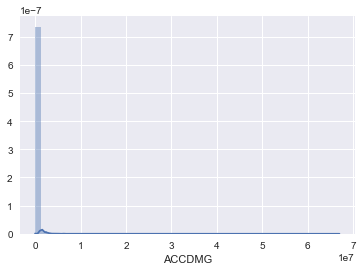

In [27]:
# Looking at the distribution of ACCDMG, you can see that it's pretty heavily skewed
sns.distplot(accidents_df.ACCDMG)

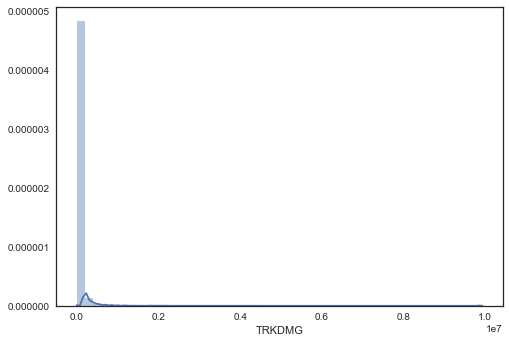

In [32]:
# Looking at the distribution of TRKDMG, you can see that it's pretty heavily skewed
sns.distplot(accidents_df.TRKDMG)

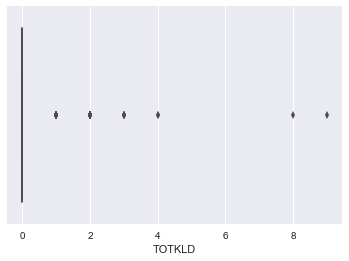

In [29]:
# Taking a look at the boxplot of TOTKLD, you can see that it's also heavily skewed
sns.boxplot(accidents_df.TOTKLD)

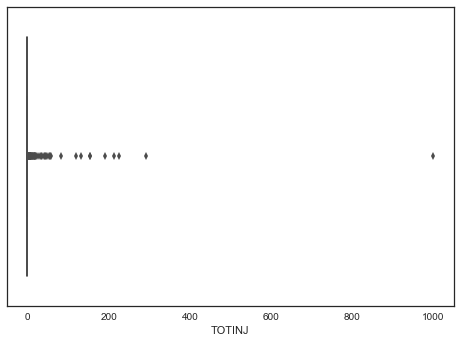

In [33]:
# Taking a look at the boxplot of TOTINJ, you can see that it's also heavily skewed
sns.boxplot(accidents_df.TOTINJ)

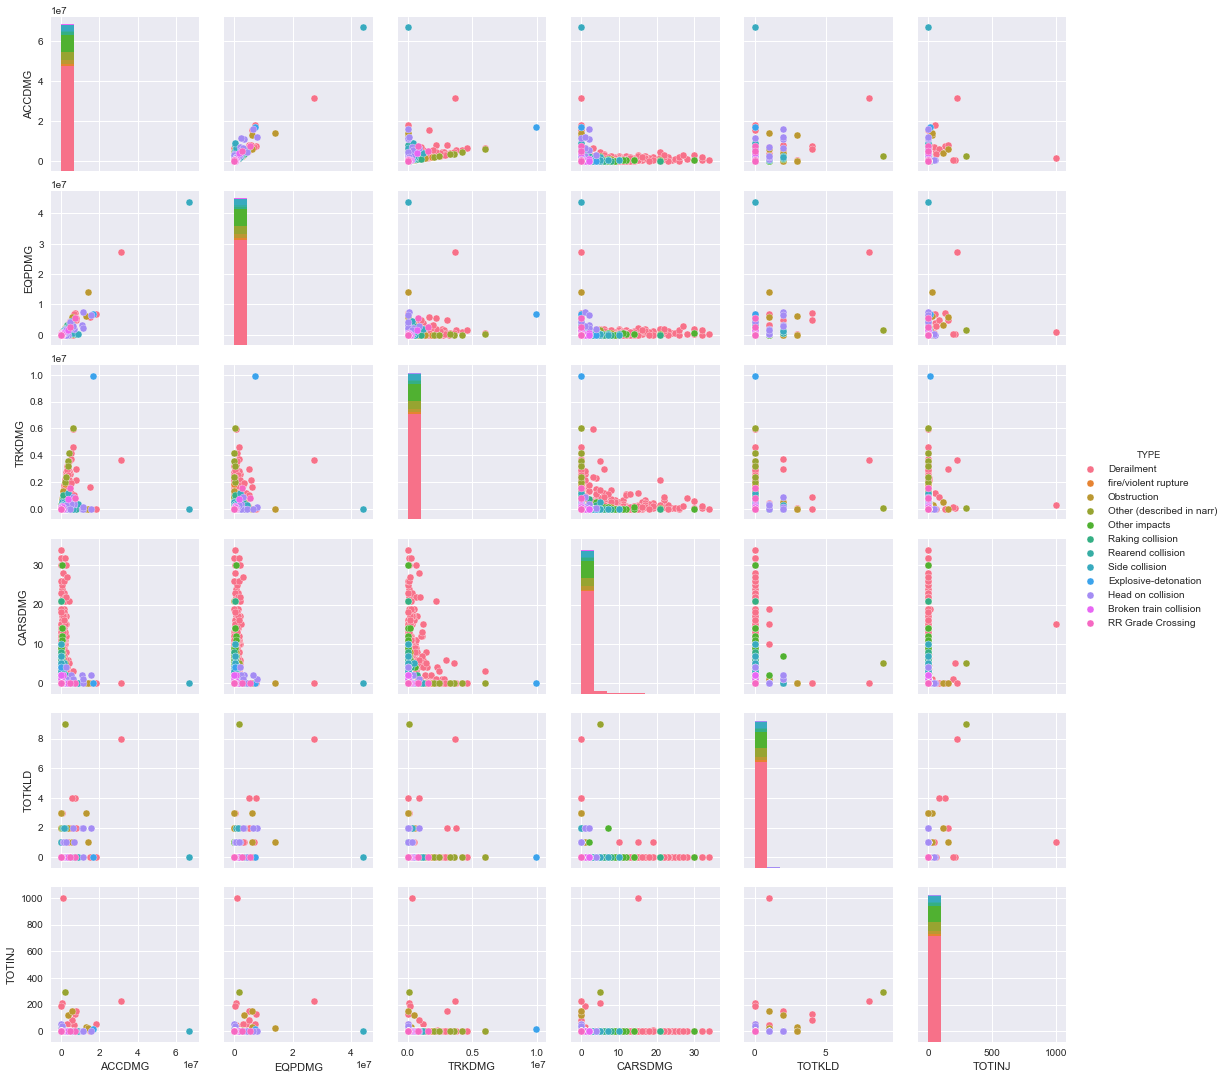

In [30]:
# With this pairplot you can get a good idea of how each response variable correlates to the others
# altogether and across different types
# Note: takes a little while to run.
sns.pairplot(accidents_df, vars = Response, hue='TYPE')
# Looks like there could be a good correlation between ACCDMG and EQPDMG

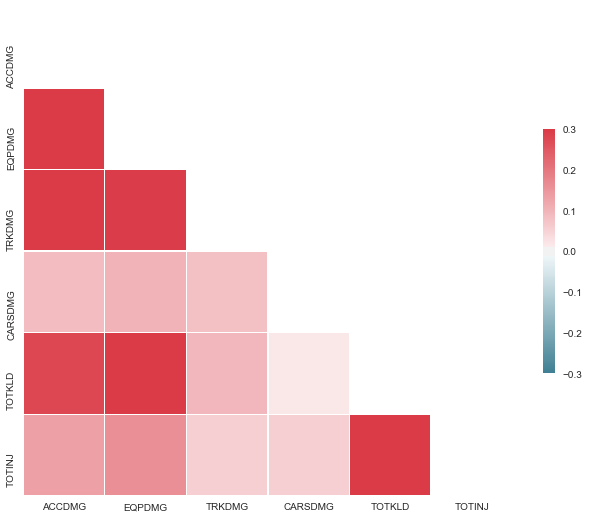

In [31]:
# Heat map to show correlations between response variables
sns.set(style="white")

# # Compute the correlation matrix
# for response variables
corr = accidents_df[Response].corr()

# # Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# And it looks like there is a pretty good correlation between ACCDMG and EQPDMG

### In-Class Exercise 3

Look at histograms of  the predictor variable TEMP at different binwidths and comment on what you observe.

### In-Class Exercise 3 Answers

At a highest binwidth (trivial case), you can see that all the is packed into one bin such that it contains ~37K observations. As you decrease the binwidth (so increase the number of bins), then you start to see the true shape of the distribution (High case below). However, if you decrease the binwidth too much (Medium and Low case below), then you start to see sparse areas and areas with a lot of observations (so the histogram is too granular at this point). Looking at the medium histogram, you can see that these bins with a large number of observations come every 5 degrees, leading us to conclude that it's likely that most of the people entering numbers into the form gave degrees to the nearest 0 or 5 number, so we have a lower resolution as to temperature on any given day and as such probably shouldn't have bins any thinner than 5 degrees Fahrenheit.

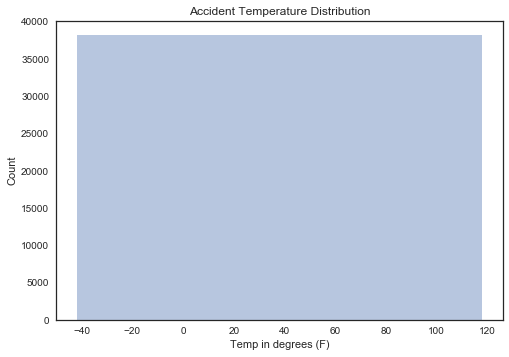

In [39]:
# Highest binwidth
temp_hist = sns.distplot(accidents_df.TEMP, bins=1, kde=False)
temp_hist.set_title('Accident Temperature Distribution')
temp_hist.set_ylabel('Count')
temp_hist.set_xlabel('Temp in degrees (F)')

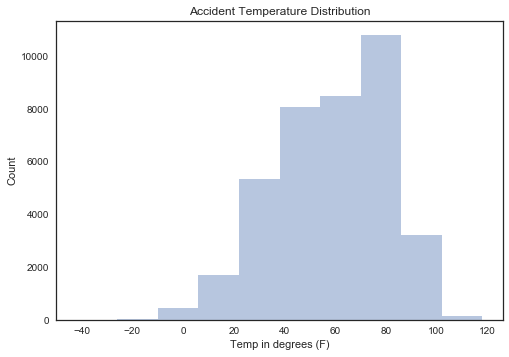

In [36]:
# High binwidth
temp_hist = sns.distplot(accidents_df.TEMP, bins=10, kde=False)
temp_hist.set_title('Accident Temperature Distribution')
temp_hist.set_ylabel('Count')
temp_hist.set_xlabel('Temp in degrees (F)')

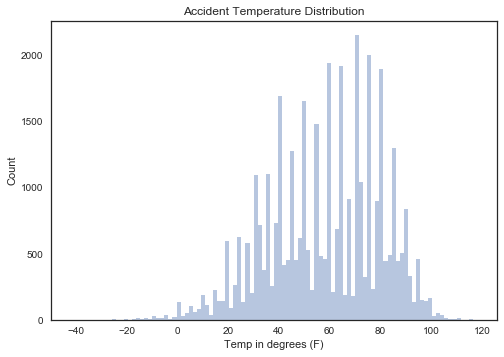

In [37]:
# Medium binwidth
temp_hist = sns.distplot(accidents_df.TEMP, bins=100, kde=False)
temp_hist.set_title('Accident Temperature Distribution')
temp_hist.set_ylabel('Count')
temp_hist.set_xlabel('Temp in degrees (F)')

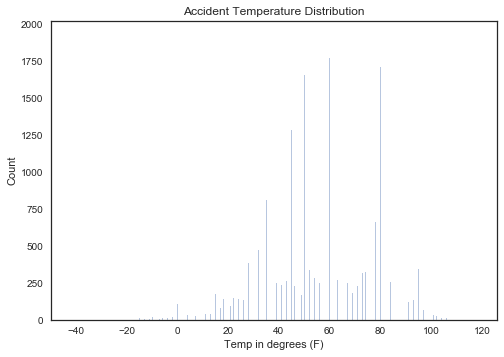

In [38]:
# Low binwidth
temp_hist = sns.distplot(accidents_df.TEMP, bins=1000, kde=False)
temp_hist.set_title('Accident Temperature Distribution')
temp_hist.set_ylabel('Count')
temp_hist.set_xlabel('Temp in degrees (F)')

### In-Class Exercise 4

Look at scatter plot matrices with a small set of predictor variables (e.g., TRNSPD, TONS, TEMP) and ACCDMG. Also look at heat maps.

### In-Class Exercise 4 Answers

This is done below for scatter plot and heat maps.
It's pretty clear right off the bat that ACCDMG has some relationship with TRNSPD and TONS. This makes sense as you might expect a crash at higher speed/with more weight to result in a greater amount of damages and thus a higher ACCDMG. It doesn't correlate well with TEMP or MONTH, implying that these variables do not have a strong linear relationship with ACCDMG (although it says nothing about any non-linear relationships.

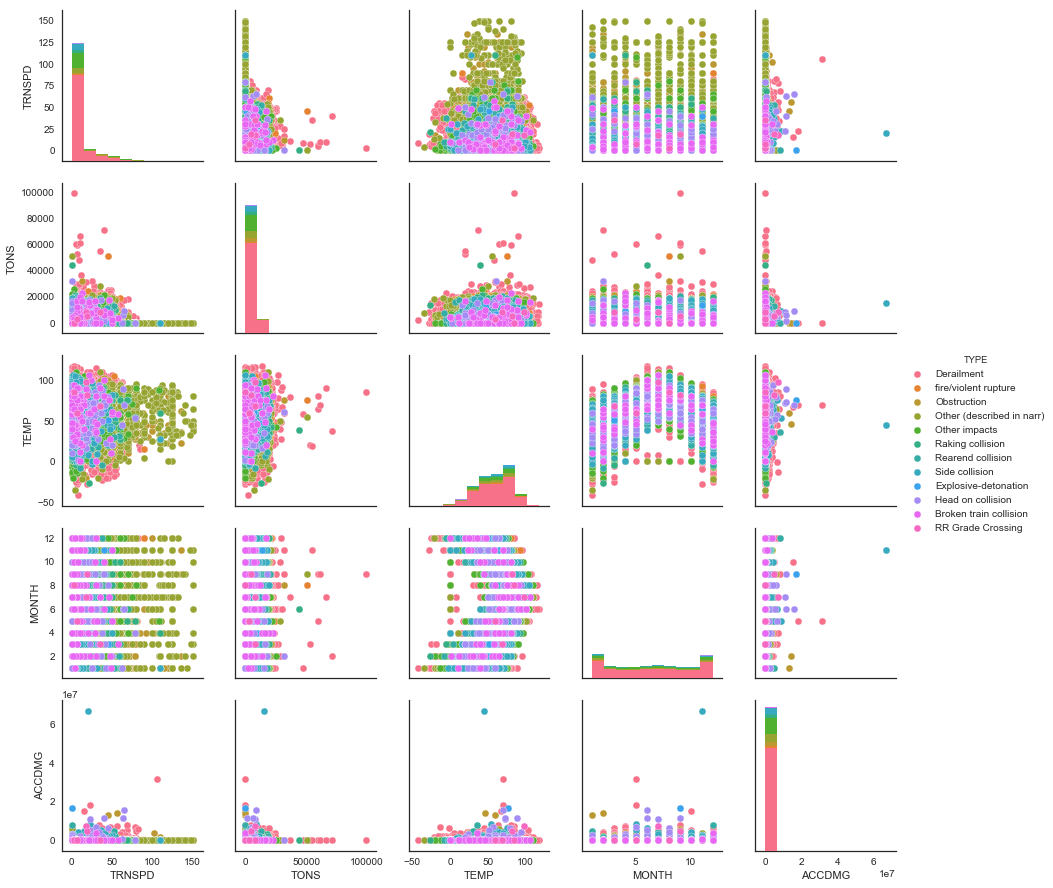

In [40]:
# Take a look at just the subset of predictors defined above + the ACCDMG column
PredPlustACCDMG = Predictors
PredPlustACCDMG.append('ACCDMG')

# And plot
sns.pairplot(accidents_df, vars = PredPlustACCDMG, hue = 'TYPE')

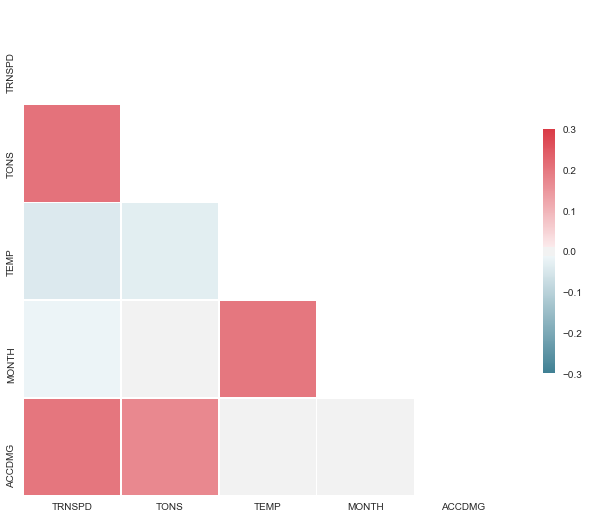

In [41]:
# Heat map to show correlations in PredPlusACCDMG
sns.set(style="white")

# # Compute the correlation matrix
# for response variables
corr = accidents_df[PredPlustACCDMG].corr()

# # Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



### In-Class Exercise 5 

Look at scatter plots between ACCDMG and TRNSPD condition on TYPE. Look at the plots with the log transform of ACCDMG. What do these plot imply?

### In-Class Exercise 5 Answers

So when looking at the relationship between ACCDMG and TRNSPD we can see that the regression lines across different types have many varying slopes. That is, they're not parallel. This implies that there is some sort of interaction between the TYPE and TRNSPD, such that the speed of the train and the expected damages will vary depending on the type of accident that we see.
When looking at the relationship between log(ACCDMG) and TRNSPD, we can see that the uncertainty around the regression lines got much smaller after taking the log, implying that the log transformation is an appropriate one for us to take for our response variable.

In [46]:
# We must make TYPE into a categorical variable for plotting
accidents_df.TYPE = accidents_df.TYPE.astype('category')

accidents_df.TYPE.values.categories

Index([u'Broken train collision', u'Derailment', u'Explosive-detonation',
       u'Head on collision', u'Obstruction', u'Other (described in narr)',
       u'Other impacts', u'RR Grade Crossing', u'Raking collision',
       u'Rearend collision', u'Side collision', u'fire/violent rupture'],
      dtype='object')

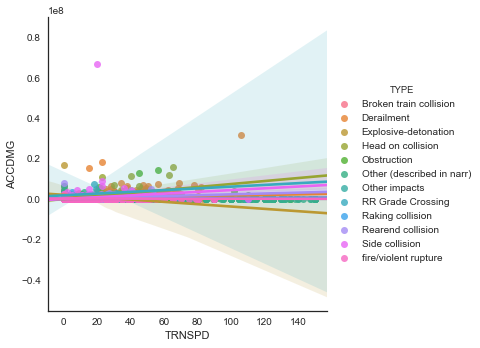

In [47]:
# Use Seaborn
sns.lmplot('TRNSPD', 'ACCDMG', data=accidents_df, hue = 'TYPE')

In [57]:
# And now take the log transform of ACCDMG
# Add a dollar to avoid taking log(0) and having an error thrown (and a dollar isn't a big deal)
accidents_df['logACCDMG'] = np.log(accidents_df['ACCDMG'] + 1)

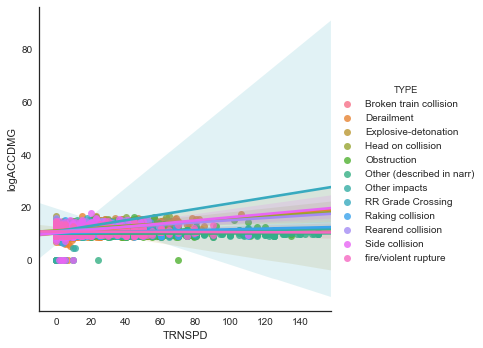

In [58]:
# New plot for the relationship of ACCDMG and TRNSPD across TYPES
sns.lmplot('TRNSPD', 'logACCDMG', data=accidents_df, hue = 'TYPE')